In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [83]:
#Data Preparation of FAO Prod Indices dataset
prod_ind_data = pd.read_csv('Dataset/archive/fao_data_production_indices_data.csv')
prod_ind_data['year']=prod_ind_data['year'].astype(pd.Int64Dtype())
agri_data = prod_ind_data[prod_ind_data['category']=='agriculture_pin']
agri_data.dropna(inplace=True)

gross_prod_data = agri_data.drop(agri_data[agri_data['element'] != 'Gross Production 1999-2001 (1000 I$)'].index)
focused_data = gross_prod_data[['country_or_area', 'year', 'value']]
focused_data.columns = ['Country', 'Year', 'Gross_Production']

rel_data = focused_data[~focused_data.Country.str.endswith('+')]

rel_data = rel_data[rel_data['Year'] == 2007]
rel_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_3644\1099709631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_data.dropna(inplace=True)


,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
564,Albania,2007,824818.0
846,Algeria,2007,4225072.0
1128,American Samoa,2007,2415.0
1692,Angola,2007,1480803.0
...,...,...,...
61496,Wallis and Futuna Islands,2007,2606.0
62624,Western Sahara,2007,5164.0
63188,Yemen,2007,1136084.0
63532,Zambia,2007,831754.0


In [84]:
#Import population data
population_data = pd.read_csv('Dataset/archive/Population_E_All_Data.csv', encoding='ISO-8859-1')
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 252929: invalid continuation byte
population_data = population_data[population_data['Element'] == 'Total Population - Both sexes']
population_data = population_data[['Area', 'Year', 'Unit', 'Value']]
population_data['Population'] = population_data['Value'] * 1000
population_data.drop(['Unit', 'Value'], axis = 1, inplace=True)
population_data.rename(columns={'Area': 'Country'}, inplace=True)
population_data = population_data[population_data['Year']==2007]
population_data

,Country,Year,Population
57,Afghanistan,2007,2.661680e+07
712,Albania,2007,3.023910e+06
1367,Algeria,2007,3.430010e+07
2022,American Samoa,2007,5.790300e+04
2375,Andorra,2007,8.268300e+04
...,...,...,...
156183,Least Developed Countries,2007,7.918073e+08
156838,Land Locked Developing Countries,2007,3.872224e+08
157493,Small Island Developing States,2007,6.298314e+07
158148,Low Income Food Deficit Countries,2007,2.380026e+09


In [85]:
#Merge population data with Prod Indices to find Gross_Prod_Per_Capita for each country
agri_percapita_data = pd.merge(rel_data, population_data, how='inner', on=['Country','Year'])
agri_percapita_data['Gross_Prod_Per_Capita'] = (agri_percapita_data['Gross_Production']/agri_percapita_data['Population'])*1000
agri_percapita_data.sort_values(by='Gross_Prod_Per_Capita', inplace=True)

agri_percapita_data
# agri_percapita_data.to_csv('Agri.csv', index=False)

,Country,Year,Gross_Production,Population,Gross_Prod_Per_Capita
32,Cayman Islands,2007,129.0,51483.0,2.505681
149,Saint Pierre and Miquelon,2007,23.0,6261.0,3.673535
157,Singapore,2007,34720.0,4732530.0,7.336456
192,Western Sahara,2007,5164.0,462207.0,11.172483
69,Greenland,2007,825.0,56927.0,14.492244
...,...,...,...,...,...
84,Ireland,2007,3629275.0,4398070.0,825.197189
187,Uruguay,2007,2770230.0,3339740.0,829.474750
6,Argentina,2007,33832140.0,39970200.0,846.434093
46,Denmark,2007,5439924.0,5469960.0,994.508918


1. Which country GDP/economic growth's major contributor is agriculture? (year = 2007)?

In [86]:
world_gdp_data = pd.read_csv('Dataset/archive/world_country_gdp_usd.csv')
world_gdp_data['Country Name'] = world_gdp_data['Country Name'].replace('United States', 'United States of America')
gdp_data_2007 = world_gdp_data[world_gdp_data['year'] == 2007]
gdp_data_2007.drop(['Country Code'], axis = 1, inplace=True)
gdp_data_2007.columns = ['Country', 'Year', 'GDP', 'GDP_Per_Capita']
gdp_data_2007

C:\Users\saumy\AppData\Local\Temp\ipykernel_3644\2518013288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_2007.drop(['Country Code'], axis = 1, inplace=True)


,Country,Year,GDP,GDP_Per_Capita
12502,Aruba,2007,2.677654e+09,26452.231950
12503,Africa Eastern and Southern,2007,6.611790e+11,1382.737442
12504,Afghanistan,2007,9.747880e+09,359.693158
12505,Africa Western and Central,2007,4.617910e+11,1430.839107
12506,Angola,2007,6.526645e+10,3121.996085
...,...,...,...,...
12763,Kosovo,2007,NaN,NaN
12764,"Yemen, Rep.",2007,2.165053e+10,1017.292048
12765,South Africa,2007,3.330750e+11,6780.884555
12766,Zambia,2007,1.405696e+10,1124.290586


In [87]:
#Merge GDP data
agri_percapita_data = pd.merge(agri_percapita_data, gdp_data_2007, how='inner', on=['Country','Year'])

agri_percapita_data

,Country,Year,Gross_Production,Population,Gross_Prod_Per_Capita,GDP,GDP_Per_Capita
0,Cayman Islands,2007,129.0,51483.0,2.505681,4.466439e+09,85433.030280
1,Singapore,2007,34720.0,4732530.0,7.336456,1.809420e+11,39432.938350
2,Greenland,2007,825.0,56927.0,14.492244,2.249812e+09,39780.951440
3,Maldives,2007,5806.0,336070.0,17.276163,1.868383e+09,5574.401981
4,Bahrain,2007,21960.0,1035890.0,21.199162,2.173000e+10,20976.442290
...,...,...,...,...,...,...,...
164,Ireland,2007,3629275.0,4398070.0,825.197189,2.700790e+11,61396.417460
165,Uruguay,2007,2770230.0,3339740.0,829.474750,2.341057e+10,7026.503055
166,Argentina,2007,33832140.0,39970200.0,846.434093,2.875310e+11,7245.446857
167,Denmark,2007,5439924.0,5469960.0,994.508918,3.194230e+11,58487.054970


In [88]:
agri_percapita_data['Agri_Share_GDP_Percent'] = (agri_percapita_data['Gross_Prod_Per_Capita']/agri_percapita_data['GDP_Per_Capita'])*100
agri_percapita_data

,Country,Year,Gross_Production,Population,Gross_Prod_Per_Capita,GDP,GDP_Per_Capita,Agri_Share_GDP_Percent
0,Cayman Islands,2007,129.0,51483.0,2.505681,4.466439e+09,85433.030280,0.002933
1,Singapore,2007,34720.0,4732530.0,7.336456,1.809420e+11,39432.938350,0.018605
2,Greenland,2007,825.0,56927.0,14.492244,2.249812e+09,39780.951440,0.036430
3,Maldives,2007,5806.0,336070.0,17.276163,1.868383e+09,5574.401981,0.309920
4,Bahrain,2007,21960.0,1035890.0,21.199162,2.173000e+10,20976.442290,0.101062
...,...,...,...,...,...,...,...,...
164,Ireland,2007,3629275.0,4398070.0,825.197189,2.700790e+11,61396.417460,1.344048
165,Uruguay,2007,2770230.0,3339740.0,829.474750,2.341057e+10,7026.503055,11.804944
166,Argentina,2007,33832140.0,39970200.0,846.434093,2.875310e+11,7245.446857,11.682290
167,Denmark,2007,5439924.0,5469960.0,994.508918,3.194230e+11,58487.054970,1.700392


In [90]:
agri_percapita_data.sort_values(by='Gross_Prod_Per_Capita', ascending = False, inplace=True)
agri_percapita_data.head(10)

,Country,Year,Gross_Production,Population,Gross_Prod_Per_Capita,GDP,GDP_Per_Capita,Agri_Share_GDP_Percent
168,New Zealand,2007,8318573.0,4233150.0,1965.102347,1.371890e+11,32479.981740,6.050195
167,Denmark,2007,5439924.0,5469960.0,994.508918,3.194230e+11,58487.054970,1.700392
166,Argentina,2007,33832140.0,39970200.0,846.434093,2.875310e+11,7245.446857,11.682290
165,Uruguay,2007,2770230.0,3339740.0,829.474750,2.341057e+10,7026.503055,11.804944
164,Ireland,2007,3629275.0,4398070.0,825.197189,2.700790e+11,61396.417460,1.344048
163,Canada,2007,22406180.0,33019900.0,678.565956,1.468820e+12,44659.895140,1.519408
162,Australia,2007,12908520.0,20946700.0,616.255544,8.539550e+11,41001.142980,1.503020
161,United States of America,2007,184698800.0,300595000.0,614.444019,1.447420e+13,48050.223780,1.278754
160,Belarus,2007,5831730.0,9536860.0,611.493720,4.527740e+10,4735.657608,12.912541
159,Netherlands,2007,9604602.0,16507100.0,581.846721,8.485590e+11,51799.208550,1.123273


In [97]:
agri_percapita_data.tail(10)

,Country,Year,Gross_Production,Population,Gross_Prod_Per_Capita,GDP,GDP_Per_Capita,Agri_Share_GDP_Percent
9,Equatorial Guinea,2007,28601.0,829327.0,34.487000,1.307172e+10,15908.411190,0.216785
8,Faroe Islands,2007,1395.0,48448.0,28.793758,2.333137e+09,48784.890500,0.059022
7,Bermuda,2007,1590.0,64892.0,24.502250,6.767000e+09,104287.387500,0.023495
6,British Virgin Islands,2007,570.0,24731.0,23.047996,NaN,NaN,NaN
5,Qatar,2007,27333.0,1189630.0,22.976051,7.971209e+10,65421.376920,0.035120
4,Bahrain,2007,21960.0,1035890.0,21.199162,2.173000e+10,20976.442290,0.101062
3,Maldives,2007,5806.0,336070.0,17.276163,1.868383e+09,5574.401981,0.309920
2,Greenland,2007,825.0,56927.0,14.492244,2.249812e+09,39780.951440,0.036430
1,Singapore,2007,34720.0,4732530.0,7.336456,1.809420e+11,39432.938350,0.018605
0,Cayman Islands,2007,129.0,51483.0,2.505681,4.466439e+09,85433.030280,0.002933


In [91]:
#Import Global Hunger Index Data(Reference: https://www.globalhungerindex.org/)
sheet_index = 2
GHI_data = pd.read_excel('Dataset/archive/Global_Hunger_Index_Scores.xlsx', sheet_name=sheet_index)
GHI_data.columns = GHI_data.iloc[1]
GHI_data = GHI_data.iloc[2:-3] #Delete the first and bottom 2 rows
GHI_data.columns = ['Country', '2000', '2007', '2014', '2022', 'Absolute change since 2014', '% change since 2014']
GHI_2007 = GHI_data[['Country', '2007']]
#The dataset contains non-numeric values like '-'
GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
GHI_2007.dropna(inplace = True)
GHI_2007.sort_values(by='2007', ascending=False, inplace=True)
GHI_2007
# gdp_data_2007 = world_gdp_data[world_gdp_data['year'] == 2007]

C:\Users\saumy\AppData\Local\Temp\ipykernel_3644\2906006307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
C:\Users\saumy\AppData\Local\Temp\ipykernel_3644\2906006307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI_2007.dropna(inplace = True)
C:\Users\saumy\AppData\Local\Temp\ipykernel_3644\2906006307.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Country,2007
109,Sierra Leone,51.1
25,Chad,49.0
24,Central African Republic,46.8
136,Zambia,46.0
122,Timor-Leste,45.5
...,...,...
110,Slovakia,5.9
126,Türkiye,5.8
103,Romania,5.8
6,Argentina,5.5


In [92]:
hunger_index_data = pd.merge(agri_percapita_data, GHI_2007, how='inner', on='Country')

In [94]:
hunger_index_data.rename(columns={'2007': 'GHI'}, inplace=True)
hunger_index_data.sort_values(by='GHI', ascending=False, inplace=True)
hunger_index_data.head(20)

,Country,Year,Gross_Production,Population,Gross_Prod_Per_Capita,GDP,GDP_Per_Capita,Agri_Share_GDP_Percent,GHI
76,Sierra Leone,2007,490025.0,6.015420e+06,81.461477,2.158497e+09,360.371661,22.604851,51.1
71,Chad,2007,1044872.0,1.077570e+07,96.965580,8.650138e+09,799.603742,12.126704,49.0
56,Central African Republic,2007,587841.0,4.275800e+06,137.480939,1.699811e+09,404.909403,33.953506,46.8
86,Zambia,2007,831754.0,1.272600e+07,65.358636,1.405696e+10,1124.290586,5.813322,46.0
87,Timor-Leste,2007,68672.0,1.064970e+06,64.482568,5.427954e+08,523.737635,12.311998,45.5
81,Angola,2007,1480803.0,2.099770e+07,70.522152,6.526645e+10,3121.996085,2.258880,44.7
79,Ethiopia,2007,6237402.0,8.100040e+07,77.004583,1.970762e+10,244.286052,31.522300,42.6
82,Haiti,2007,656761.0,9.556890e+06,68.721205,9.522763e+09,1002.888487,6.852328,41.7
51,Niger,2007,2123490.0,1.466830e+07,144.767287,5.731485e+09,390.284480,37.092760,40.2
80,Liberia,2007,268294.0,3.512930e+06,76.373284,1.373000e+09,396.601761,19.256920,39.0


In [ ]:

# max_index = agri_percapita_data['Agri_Share_GDP_Percent'].idxmax()

# # Retrieve the corresponding row using .loc
# max_row = agri_percapita_data.loc[max_index]
# max_row

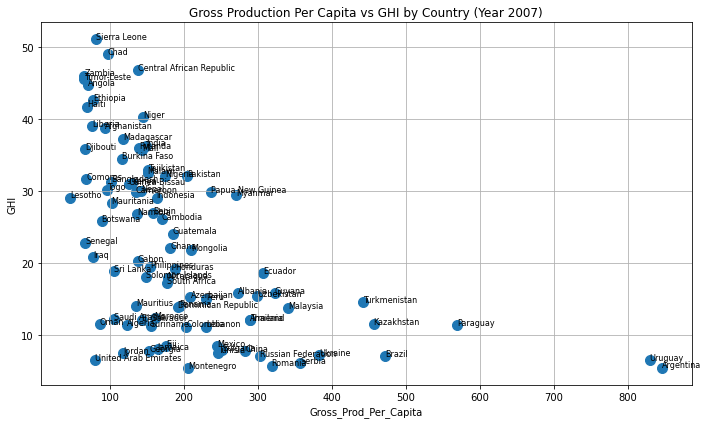

In [95]:
# Data Visualization
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hunger_index_data['Gross_Prod_Per_Capita'], hunger_index_data['GHI'], marker='o', s=100)

plt.xlabel('Gross_Prod_Per_Capita')
plt.ylabel('GHI')
plt.title('Gross Production Per Capita vs GHI by Country (Year 2007)')

# Add country labels
for i, row in hunger_index_data.iterrows():
    plt.annotate(row['Country'], (row['Gross_Prod_Per_Capita'], row['GHI']), fontsize=8)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

I will take those countries where Gross Prod Per Capita is less and GHI is high and compare with those countries where Gross Prod Per Capita is high. Analyze the underlying factors for these countries.